# Declaration of Originality

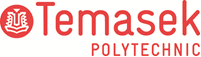

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Aloysius (2401814E)
* Tutorial Group                : P04
* Tutor						    : Emile SABASTIAN
* Submission Date               : 11/2/26


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [691]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly


# 1. Business Understanding
Goal: Predict a smartphone’s final price using its specifications and attributes

# 2. Data Understanding

## 2.1 Load dataset

In [692]:
## Read *.csv file into pandas DataFrame
FILE_PATH = 'smartphones.csv'
df = pd.read_csv(FILE_PATH)
df


,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price
0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.00000000000000000000,256.00000000000000000000,Yellow,Yes,231.59999999999999431566
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.00000000000000000000,128.00000000000000000000,Blue,Yes,279.00000000000000000000
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.00000000000000000000,128.00000000000000000000,Blue,Yes,179.00999999999999090505
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.00000000000000000000,128.00000000000000000000,Gray,Yes,279.99000000000000909495
4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.00000000000000000000,512.00000000000000000000,White,Yes,799.00000000000000000000
...,...,...,...,...,...,...,...,...
1811,Xiaomi Redmi Note 8 4/64GB Azul Libre,Xiaomi,Redmi Note 8,4.00000000000000000000,64.00000000000000000000,Blue,Yes,249.00999999999999090505
1812,Xiaomi Redmi Note 8T 4/128GB Azul Estelar Libre,Xiaomi,Redmi Note 8T,4.00000000000000000000,128.00000000000000000000,Blue,Yes,200.00000000000000000000
1813,Xiaomi Redmi Note 9 4/128GB Blanco Libre,Xiaomi,Redmi Note 9,4.00000000000000000000,128.00000000000000000000,White,Yes,269.00000000000000000000
1814,Xiaomi Redmi Note 9S 4/64GB Dual SIM Gris Libre,Xiaomi,Note 9S,4.00000000000000000000,64.00000000000000000000,Gray,Yes,211.00000000000000000000


## 2.2 Summary Statistics

In [693]:
## Understand the type of variable for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Smartphone   1816 non-null   object 
 1   Brand        1816 non-null   object 
 2   Model        1816 non-null   object 
 3   RAM          1333 non-null   float64
 4   Storage      1791 non-null   float64
 5   Color        1816 non-null   object 
 6   Free         1816 non-null   object 
 7   Final Price  1816 non-null   float64
dtypes: float64(3), object(5)
memory usage: 113.6+ KB


In [694]:
## Check for missing data
df.isna().sum() 

Smartphone       0
Brand            0
Model            0
RAM            483
Storage         25
Color            0
Free             0
Final Price      0
dtype: int64

In [695]:
## Describe data distribution
df.describe(include='all')

,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price
count,1816,1816,1816,1333.00000000000000000000,1791.00000000000000000000,1816,1816,1816.00000000000000000000
unique,1816,37,383,NaN,NaN,17,2,NaN
top,Realme C55 8/256GB Sunshower Libre,Samsung,iPhone 13,NaN,NaN,Black,Yes,NaN
freq,1,458,60,NaN,NaN,537,1772,NaN
mean,NaN,NaN,NaN,5.96099024756189077578,162.65214963707427386908,NaN,NaN,492.17557268722464414168
std,NaN,NaN,NaN,2.66806994227509708395,139.41160529993109662428,NaN,NaN,398.60618257981957412994
min,NaN,NaN,NaN,1.00000000000000000000,2.00000000000000000000,NaN,NaN,60.46000000000000085265
25%,NaN,NaN,NaN,4.00000000000000000000,64.00000000000000000000,NaN,NaN,200.99000000000000909495
50%,NaN,NaN,NaN,6.00000000000000000000,128.00000000000000000000,NaN,NaN,349.99000000000000909495
75%,NaN,NaN,NaN,8.00000000000000000000,256.00000000000000000000,NaN,NaN,652.71749999999997271516


In [696]:
# Clean column names
df.columns = [c.strip().replace(" ", "_") for c in df.columns]
df.columns

Index(['Smartphone', 'Brand', 'Model', 'RAM', 'Storage', 'Color', 'Free',
       'Final_Price'],
      dtype='object')

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

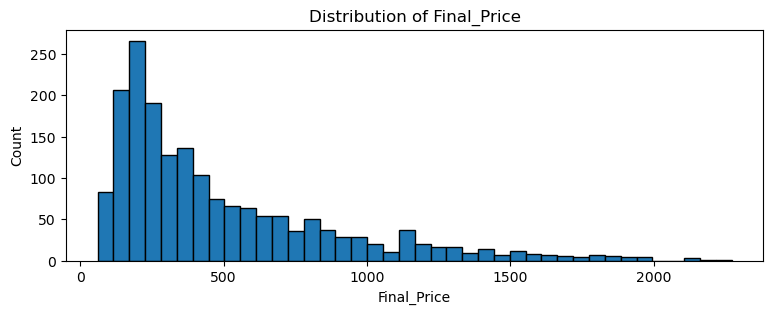

What this graph shows:
- How the target (Final_Price) values are spread across the dataset (common vs rare prices).
What we can tell:
- The distribution is right-skewed (many cheaper phones, fewer expensive phones).
- Outliers (very high prices) exist and can affect RMSE more than MAE.


In [697]:
## Understanding distribution of target
import matplotlib.pyplot as plt

target = "Final_Price"
y = df[target].dropna()

plt.figure(figsize=(9, 3))
plt.hist(y, bins=40, edgecolor="black")
plt.title("Distribution of Final_Price")
plt.xlabel("Final_Price")
plt.ylabel("Count")
plt.show()

print("What this graph shows:")
print("- How the target (Final_Price) values are spread across the dataset (common vs rare prices).")

if y.skew() > 0.5:
    print("What we can tell:")
    print("- The distribution is right-skewed (many cheaper phones, fewer expensive phones).")
    print("- Outliers (very high prices) exist and can affect RMSE more than MAE.")
else:
    print("What we can tell:")
    print("- The distribution is not strongly skewed, so the target values are more evenly spread.")



### 2.3.1.2 Understanding distribution of features

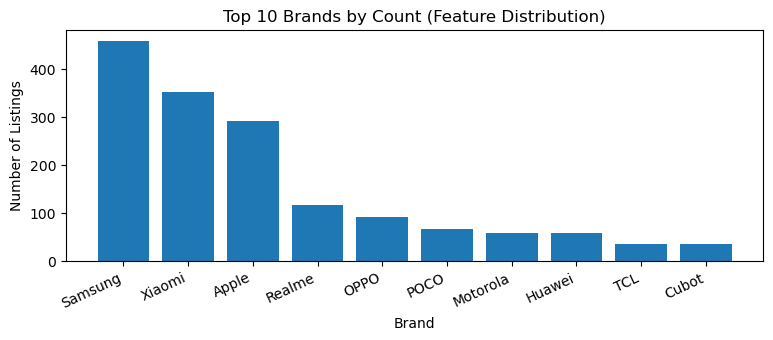

What this graph shows:
- The most common brands in the dataset (how the data is distributed across brands).
What we can tell:
- One brand dominates the dataset, so the model may learn patterns biased toward that brand.


In [698]:
## Understanding distribution of features
import matplotlib.pyplot as plt

col = "Brand"

# Safety check
if col not in df.columns:
    raise ValueError(f"Column '{col}' not found in df. Available columns: {list(df.columns)}")

top = df[col].value_counts().head(10)

plt.figure(figsize=(9, 3))
plt.bar(top.index.astype(str), top.values)
plt.title("Top 10 Brands by Count (Feature Distribution)")
plt.xlabel("Brand")
plt.ylabel("Number of Listings")
plt.xticks(rotation=25, ha="right")
plt.show()

print("What this graph shows:")
print("- The most common brands in the dataset (how the data is distributed across brands).")

dominant_ratio = top.iloc[0] / top.sum()
if dominant_ratio > 0.25:
    print("What we can tell:")
    print("- One brand dominates the dataset, so the model may learn patterns biased toward that brand.")



### 2.3.2 Understanding relationship between variables

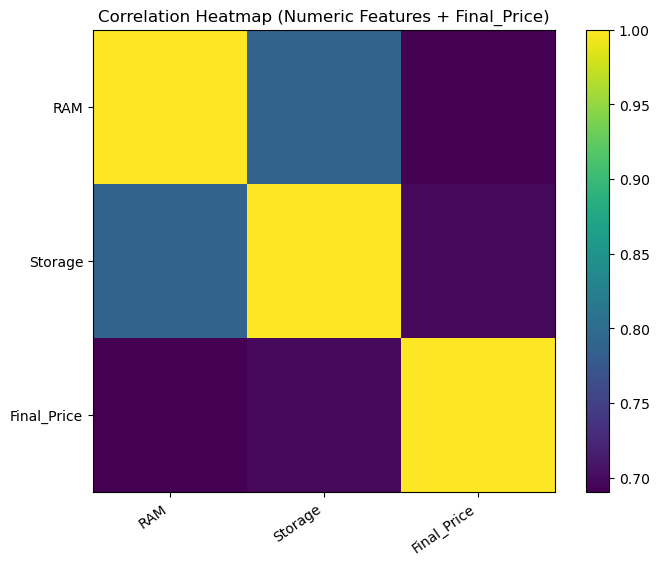

What this graph shows:
- The strength and direction of linear relationships between numeric features and Final_Price.
- Values closer to +1 mean strong positive relationship; closer to -1 mean strong negative relationship.
What we can tell:
- The strongest numeric predictors (by correlation magnitude) are:
  • Storage: 0.70 (positive relationship)
  • RAM: 0.69 (positive relationship)
- These features are good candidates to prioritise in modelling / feature selection.


In [699]:
## Understanding relationship between variables
import matplotlib.pyplot as plt
import numpy as np

target = "Final_Price"

if target not in df.columns:
    raise ValueError(f"Target '{target}' not found in df. Available columns: {list(df.columns)}")

# Take numeric columns only (auto-detect) and include the target
num_df = df.select_dtypes(include=[np.number]).copy()

if target not in num_df.columns:
    # If Final_Price got read as non-numeric somehow
    num_df[target] = pd.to_numeric(df[target], errors="coerce")

# Keep only columns that have enough non-null values
num_df = num_df.dropna(axis=1, thresh=int(0.7 * len(num_df)))

# Correlation matrix
corr = num_df.corr()

plt.figure(figsize=(8, 6))
plt.imshow(corr.values)
plt.title("Correlation Heatmap (Numeric Features + Final_Price)")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=35, ha="right")
plt.yticks(range(len(corr.index)), corr.index)
plt.colorbar()
plt.show()

print("What this graph shows:")
print("- The strength and direction of linear relationships between numeric features and Final_Price.")
print("- Values closer to +1 mean strong positive relationship; closer to -1 mean strong negative relationship.")

# Identify top 3 features most related to target (excluding itself)
if target in corr.columns:
    corr_target = corr[target].drop(labels=[target]).dropna().sort_values(key=lambda s: s.abs(), ascending=False)
    top3 = corr_target.head(3)

    print("What we can tell:")
    if len(top3) > 0:
        print("- The strongest numeric predictors (by correlation magnitude) are:")
        for name, val in top3.items():
            direction = "positive" if val > 0 else "negative"
            print(f"  • {name}: {val:.2f} ({direction} relationship)")
        print("- These features are good candidates to prioritise in modelling / feature selection.")
    else:
        print("- No numeric feature has a strong linear relationship with the target (might need non-linear models/features).")



# 3. Data Preparation

## 3.1 Data Cleaning

In [700]:
## Clean data
# Findings from earlier checks 
print("Data cleaning findings (from earlier checks):")
print("- Total rows: 1816")
print("- Missing values:")
print("  • RAM: 483 missing")
print("  • Storage: 25 missing")
print("  • All other columns: 0 missing")
print("- RAM, Storage, Final Price are numeric; others are categorical.")


Data cleaning findings (from earlier checks):
- Total rows: 1816
- Missing values:
  • RAM: 483 missing
  • Storage: 25 missing
  • All other columns: 0 missing
- RAM, Storage, Final Price are numeric; others are categorical.


In [701]:
# Evidence - which brands have missing RAM / Storage?
import pandas as pd

# Reload raw data (so we can compute missingness before any filling)
df_raw = pd.read_csv("smartphones.csv")

# If you already cleaned column names earlier, do the same here so columns match
df_raw.columns = [c.strip().replace(" ", "_") for c in df_raw.columns]

# Check total missing
print("Total missing values (RAW):")
print("RAM missing:", df_raw["RAM"].isna().sum())
print("Storage missing:", df_raw["Storage"].isna().sum())

# Compute missing counts by brand (this is what you wanted)
ram_missing_by_brand = (
    df_raw[df_raw["RAM"].isna()]
    .groupby("Brand")
    .size()
    .sort_values(ascending=False)
    .to_frame("RAM_Missing_Count")
)

storage_missing_by_brand = (
    df_raw[df_raw["Storage"].isna()]
    .groupby("Brand")
    .size()
    .sort_values(ascending=False)
    .to_frame("Storage_Missing_Count")
)

print("\nMissing RAM by Brand (show all brands with missing RAM):")
display(ram_missing_by_brand)

print("\nMissing Storage by Brand (show all brands with missing Storage):")
display(storage_missing_by_brand)

print("\nWhat this shows:")
print("- Which brands are responsible for missing RAM/Storage BEFORE cleaning.")
print("- If one brand dominates (e.g., Apple), missingness is systematic, not random.")


Total missing values (RAW):
RAM missing: 483
Storage missing: 25

Missing RAM by Brand (show all brands with missing RAM):


,RAM_Missing_Count
Brand,
Apple,292
Samsung,151
Huawei,11
Motorola,5
OnePlus,4
Xiaomi,4
SPC,2
Sony,2
ZTE,2



Missing Storage by Brand (show all brands with missing Storage):


,Storage_Missing_Count
Brand,
Samsung,9
Huawei,7
Motorola,4
Crosscall,1
Honor,1
Nokia,1
SPC,1
Sony,1



What this shows:
- Which brands are responsible for missing RAM/Storage BEFORE cleaning.
- If one brand dominates (e.g., Apple), missingness is systematic, not random.


In [702]:
# cleaning

# Add missing flags (keeps systematic missingness info)
df["RAM_missing"] = df["RAM"].isna().astype(int)
df["Storage_missing"] = df["Storage"].isna().astype(int)  # optional but consistent

# Impute RAM: Brand median -> global median fallback
ram_missing_before = df["RAM"].isna().sum()
global_ram_median = df["RAM"].median()

df["RAM"] = df["RAM"].fillna(df.groupby("Brand")["RAM"].transform("median"))
df["RAM"] = df["RAM"].fillna(global_ram_median)

# Impute Storage: Brand median -> global median fallback
storage_missing_before = df["Storage"].isna().sum()
global_storage_median = df["Storage"].median()

df["Storage"] = df["Storage"].fillna(df.groupby("Brand")["Storage"].transform("median"))
df["Storage"] = df["Storage"].fillna(global_storage_median)

print("Cleaning applied:")
print(f"- RAM missing before: {ram_missing_before} -> after: {df['RAM'].isna().sum()}")
print(f"- Storage missing before: {storage_missing_before} -> after: {df['Storage'].isna().sum()}")

print("\nWhy this approach:")
print("- RAM missing is dominated by Apple/Samsung, so missingness is not random.")
print("- RAM_missing lets the model learn 'missing RAM' as a meaningful signal.")
print("- Imputation ensures models can train without dropping Apple phones.")


Cleaning applied:
- RAM missing before: 483 -> after: 0
- Storage missing before: 25 -> after: 0

Why this approach:
- RAM missing is dominated by Apple/Samsung, so missingness is not random.
- RAM_missing lets the model learn 'missing RAM' as a meaningful signal.
- Imputation ensures models can train without dropping Apple phones.


In [703]:
# Step 3: Verification (proof that cleaning worked)

print("Verification 1: Missing values after imputation")
display(df[["RAM", "Storage"]].isna().sum().to_frame("Missing_Count"))

print("\nVerification 2: How many rows originally had missing values (indicator counts)")
flag_counts = pd.DataFrame({
    "Count_of_1s": [df["RAM_missing"].sum(), df["Storage_missing"].sum()],
    "Percentage": [
        df["RAM_missing"].mean() * 100,
        df["Storage_missing"].mean() * 100
    ]
}, index=["RAM_missing", "Storage_missing"])

display(flag_counts)

print("\nWhat we can tell:")
print("- RAM and Storage now have 0 missing values (ready for modelling).")
print("- RAM_missing shows how many rows originally had RAM missing (systematic missingness).")
print("- Storage_missing shows how many rows originally had Storage missing (small amount).")


Verification 1: Missing values after imputation


,Missing_Count
RAM,0
Storage,0



Verification 2: How many rows originally had missing values (indicator counts)


,Count_of_1s,Percentage
RAM_missing,483,26.59691629955947078656
Storage_missing,25,1.37665198237885455512



What we can tell:
- RAM and Storage now have 0 missing values (ready for modelling).
- RAM_missing shows how many rows originally had RAM missing (systematic missingness).
- Storage_missing shows how many rows originally had Storage missing (small amount).


In [704]:
# duplicates
dup_before = df.duplicated().sum()
df = df.drop_duplicates()
dup_after = df.duplicated().sum()
print("Duplicate rows check:")
print("Duplicates before:", dup_before)
print("Duplicates after:", dup_after)


Duplicate rows check:
Duplicates before: 0
Duplicates after: 0


In [705]:
# Drop 'Smartphone' column
if "Smartphone" in df.columns:
    df = df.drop(columns=["Smartphone"])
    print("\nDropped column: Smartphone")

print("\nWhat we can tell:")
print("- 'Smartphone' is a free-text field (e.g., model + RAM/Storage in the name).")
print("- Keeping it can cause the model to 'memorise' specific phone names (data leakage) instead of learning real patterns.")
print("- Dropping it makes the model rely on proper features like Brand/Model/RAM/Storage/Free.")



Dropped column: Smartphone

What we can tell:
- 'Smartphone' is a free-text field (e.g., model + RAM/Storage in the name).
- Keeping it can cause the model to 'memorise' specific phone names (data leakage) instead of learning real patterns.
- Dropping it makes the model rely on proper features like Brand/Model/RAM/Storage/Free.


## 3.2 Train-Test Split

In [706]:
## Split data into train set and test set
from sklearn.model_selection import train_test_split

target = "Final_Price"

# Safety: ensure Smartphone is not used
if "Smartphone" in df.columns:
    df = df.drop(columns=["Smartphone"])
    print("Dropped column: Smartphone (safety check)")

# 1) Separate features (X) and target (y)
X = df.drop(columns=[target])
y = df[target]

# 2) Train-test split (80% train, 20% test) with reproducible random state
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# 3) Evidence output
print("Train-test split completed (80/20)")
print(f"Total rows: {len(df)}")
print(f"Train rows: {len(X_train)} ({len(X_train)/len(df)*100:.1f}%)")
print(f"Test rows: {len(X_test)} ({len(X_test)/len(df)*100:.1f}%)")


Train-test split completed (80/20)
Total rows: 1816
Train rows: 1452 (80.0%)
Test rows: 364 (20.0%)


In [707]:
# Preprocess features
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

target = "Final_Price"

# Safety: ensure Smartphone is not used
for d in [X_train, X_test]:
    if "Smartphone" in d.columns:
        d.drop(columns=["Smartphone"], inplace=True)

# Identify column types (based on X_train)
numeric_features = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X_train.select_dtypes(include=["object"]).columns.tolist()

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

# Preprocessor: one-hot encode categorical, passthrough numeric
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", "passthrough", numeric_features),
    ]
)

print("\nWhat this does:")
print("- Converts text columns (Brand/Model/Color/Free/etc.) into numeric one-hot encoded features.")
print("- Keeps numeric columns (RAM/Storage/RAM_missing/etc.) as they are.")
print("- This makes the dataset compatible with LinearRegression and most ML models.")


Numeric features: ['RAM', 'Storage', 'RAM_missing', 'Storage_missing']
Categorical features: ['Brand', 'Model', 'Color', 'Free']

What this does:
- Converts text columns (Brand/Model/Color/Free/etc.) into numeric one-hot encoded features.
- Keeps numeric columns (RAM/Storage/RAM_missing/etc.) as they are.
- This makes the dataset compatible with LinearRegression and most ML models.


# 4. Modelling

### 4.2 Train Model

In [708]:
## Initialise and train base model (Pipeline: preprocessing + regression)

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Identify column types (from X_train only)
numeric_features = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X_train.select_dtypes(include=["object"]).columns.tolist()

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

# 2) Preprocessor (one-hot encode categorical, passthrough numeric)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", "passthrough", numeric_features),
    ]
)

# 3) Base model: Linear Regression
model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("regressor", LinearRegression())
])

print("Initialised model:", type(model).__name__)
print("Regressor:", model.named_steps["regressor"].__class__.__name__)
# 4) Train model (fit on TRAIN only)
model.fit(X_train, y_train)
print("Model training completed.")
print("Next step: evaluate on train/test (R², MAE, RMSE).")

Numeric features: ['RAM', 'Storage', 'RAM_missing', 'Storage_missing']
Categorical features: ['Brand', 'Model', 'Color', 'Free']
Initialised model: Pipeline
Regressor: LinearRegression
Model training completed.
Next step: evaluate on train/test (R², MAE, RMSE).


# 5. Model Evaluation

In [709]:
# Model Evaluation + Best Model Selection (compare models on TEST)

import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


# Define models 
models = {
    "LinearRegression": LinearRegression(),
    "Ridge(alpha=1.0)": Ridge(alpha=1.0, random_state=42),
    "Lasso(alpha=0.001)": Lasso(alpha=0.001, random_state=42, max_iter=10000),
    "RandomForest(n=300)": RandomForestRegressor(
        n_estimators=300, random_state=42, n_jobs=-1
    ),
    "GradientBoosting": GradientBoostingRegressor(
        random_state=42
    ),
}


# 2) Train + evaluate each model using the SAME preprocessing
results = []
trained_pipelines = {}

for name, reg in models.items():
    pipe = Pipeline(steps=[
        ("preprocess", preprocessor),
        ("regressor", reg),
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append({
        "Model": name,
        "Test R2": r2,
        "Test MAE": mae,
        "Test RMSE": rmse,
    })

    trained_pipelines[name] = pipe


# 3) Show comparison table (sorted by best RMSE)
results_df = pd.DataFrame(results).sort_values("Test RMSE").reset_index(drop=True)
display(results_df)


# 4) Pick best model (lowest Test RMSE)
best_model_name = results_df.loc[0, "Model"]
best_model_pipeline = trained_pipelines[best_model_name]

print("Best model (lowest Test RMSE):", best_model_name)
print("Best model pipeline:", best_model_pipeline)


,Model,Test R2,Test MAE,Test RMSE
0,LinearRegression,0.82385750444224215006,116.35235863431640268573,182.12395767676048308203
1,Lasso(alpha=0.001),0.82163881632535396005,118.17015282800619502268,183.26738356074275770879
2,Ridge(alpha=1.0),0.80643742317385092022,124.73894299915951933144,190.91748481831504591355
3,RandomForest(n=300),0.79804686152608272920,116.39712940138485919306,195.01153917907325308079
4,GradientBoosting,0.77636545279919977336,138.81213171917190152271,205.21280371743887371849


Best model (lowest Test RMSE): LinearRegression
Best model pipeline: Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Brand', 'Model', 'Color',
                                                   'Free']),
                                                 ('num', 'passthrough',
                                                  ['RAM', 'Storage',
                                                   'RAM_missing',
                                                   'Storage_missing'])])),
                ('regressor', LinearRegression())])


In [710]:
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Show 20 decimal places in tables
pd.set_option("display.float_format", lambda x: f"{x:.20f}")

def eval_metrics(y_true, y_pred):
    return {
        "Test R2": r2_score(y_true, y_pred),
        "Test MAE": mean_absolute_error(y_true, y_pred),
        "Test RMSE": float(np.sqrt(mean_squared_error(y_true, y_pred))),
    }

# ---------------------------------------------------------
# 1) BEFORE TUNING (Baseline)
# ---------------------------------------------------------
base_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("regressor", LinearRegression())
])

base_pipeline.fit(X_train, y_train)
pred_before = base_pipeline.predict(X_test)

before_metrics = eval_metrics(y_test, pred_before)
before_df = pd.DataFrame([{
    "Setting": "Before Tuning",
    "Model": "LinearRegression",
    **before_metrics
}])

print("Before tuning metrics:")
display(before_df)

# ---------------------------------------------------------
# 2) RandomizedSearchCV tuning (ONLY meaningful param here)
#    - remove `positive` to avoid failed folds / NaN scores
#    - keep <= 3 values (teacher requirement)
# ---------------------------------------------------------
param_distributions = {
    "regressor__fit_intercept": [True, False]   # <= 3 values ✅
}

search = RandomizedSearchCV(
    estimator=base_pipeline,
    param_distributions=param_distributions,
    n_iter=2,                 # only 2 candidates anyway
    cv=5,
    scoring="neg_root_mean_squared_error",
    random_state=42,
    n_jobs=-1,
    verbose=1,
    error_score="raise"       # makes debugging easier; no silent NaNs
)

search.fit(X_train, y_train)

tuned_pipeline = search.best_estimator_
pred_after = tuned_pipeline.predict(X_test)

after_metrics = eval_metrics(y_test, pred_after)
after_df = pd.DataFrame([{
    "Setting": "After Tuning (RandomizedSearchCV)",
    "Model": "LinearRegression",
    **after_metrics
}])

print("After tuning metrics:")
display(after_df)

# ---------------------------------------------------------
# 3) Comparison + Winner decision (lower RMSE is better)
# ---------------------------------------------------------
comparison_df = pd.concat([before_df, after_df], ignore_index=True)
print("Comparison (20 dp):")
display(comparison_df)

print("Best params found:", search.best_params_)
print("Best CV RMSE:", f"{(-search.best_score_):.20f}")

# Deltas (After - Before)
delta_df = pd.DataFrame([{
    "Delta Test R2": after_metrics["Test R2"] - before_metrics["Test R2"],
    "Delta Test MAE": after_metrics["Test MAE"] - before_metrics["Test MAE"],
    "Delta Test RMSE": after_metrics["Test RMSE"] - before_metrics["Test RMSE"],
}])

print("Difference (After - Before):")
display(delta_df)

# Winner logic (lower RMSE wins)
winner = "After Tuning" if after_metrics["Test RMSE"] < before_metrics["Test RMSE"] else "Before Tuning"
print("Best Model:", winner)

final_tuned_model = tuned_pipeline if winner == "After Tuning" else base_pipeline
print("Final tuned model saved as: final_tuned_model")

# ---------------------------------------------------------
# 4) Clear explanation text for your report
# ---------------------------------------------------------
print("\nExplanation (for report):")
print("- LinearRegression has very few hyperparameters.")
print("- We tuned the only meaningful setting: fit_intercept (True/False) using RandomizedSearchCV (5-fold CV).")
print("- We compare Test R2/MAE/RMSE before vs after tuning; lower RMSE indicates better generalisation.")
print("- If tuning does not improve RMSE, we keep the original baseline model to match business need: minimise price prediction error.")


Before tuning metrics:


,Setting,Model,Test R2,Test MAE,Test RMSE
0,Before Tuning,LinearRegression,0.82385750444224215006,116.35235863431640268573,182.12395767676048308203


Fitting 5 folds for each of 2 candidates, totalling 10 fits
After tuning metrics:


,Setting,Model,Test R2,Test MAE,Test RMSE
0,After Tuning (RandomizedSearchCV),LinearRegression,0.82307714156704048225,116.14023801740275132488,182.52694308680264612121


Comparison (20 dp):


,Setting,Model,Test R2,Test MAE,Test RMSE
0,Before Tuning,LinearRegression,0.82385750444224215006,116.35235863431640268573,182.12395767676048308203
1,After Tuning (RandomizedSearchCV),LinearRegression,0.82307714156704048225,116.14023801740275132488,182.52694308680264612121


Best params found: {'regressor__fit_intercept': False}
Best CV RMSE: 190.45163667909460514238
Difference (After - Before):


,Delta Test R2,Delta Test MAE,Delta Test RMSE
0,-0.00078036287520166780,-0.21212061691365136085,0.40298541004216303918


Best Model: Before Tuning
Final tuned model saved as: final_tuned_model

Explanation (for report):
- LinearRegression has very few hyperparameters.
- We tuned the only meaningful setting: fit_intercept (True/False) using RandomizedSearchCV (5-fold CV).
- We compare Test R2/MAE/RMSE before vs after tuning; lower RMSE indicates better generalisation.
- If tuning does not improve RMSE, we keep the original baseline model to match business need: minimise price prediction error.


In [711]:
import joblib

# change this variable name to whatever your final pipeline is called in mldp.ipynb
model_to_save = best_model_pipeline   # or final_tuned_model, final_model, etc.

joblib.dump(model_to_save, "final_price_model_mldp.joblib")
print("Saved MLDP model to final_price_model_mldp.joblib")

Saved MLDP model to final_price_model_mldp.joblib


## Iterative model development
